# Imports and settings

In [535]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [536]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Initial Data loading and understanding

In [537]:
df = pd.read_csv('../Data Collection/Datasets/alonhadat.com/raw/alonhadat.csv')
# Select only the specific columns you're interested in
df.head()

,address,area,bedrooms,date,floors,price,title,url
0,"Đường Nguyễn Văn Cừ, Phường Gia Thụy, Quận Lon...",80 m\n2,1 phòng ngủ,Hôm nay,1 lầu,"7,5 tỷ","🥇ĐẤT NGUYỄN VĂN CỪ 80M, MT8M, MẢNH ĐẤT RỘNG TH...",https://alonhadat.com.vnhttps://alonhadat.com....
1,"Đường Ngọc Lâm, Phường Ngọc Lâm, Quận Long Biê...",36 m\n2,3 phòng ngủ,Hôm nay,6 lầu,"8,65 tỷ","🔥CÒN DUY NHẤT 1 CĂN GIÁ RẺ, NGỌC LÂM 36M, 6T G...",https://alonhadat.com.vnhttps://alonhadat.com....
2,"Đường Ngô Gia Tự, Phường Đức Giang, Quận Long ...",56 m\n2,1 phòng ngủ,Hôm nay,1 lầu,"15,5 tỷ","👉MẶT PHỐ, NGÔ GIA TỰ, 56M, MT4M, VỈA HÈ ĐÁ BÓN...",https://alonhadat.com.vnhttps://alonhadat.com....
3,"Đường Phúc Lợi, Phường Phúc Lợi, Quận Long Biê...",32 m\n2,3 phòng ngủ,Hôm nay,5 lầu,"5,2 tỷ","🥇CĂN DUY NHẤT, NGÕ THÔNG, Ô TÔ , LÔ GÓC, PHÚC ...",https://alonhadat.com.vnhttps://alonhadat.com....
4,"Phố Lệ Mật, Phường Việt Hưng, Quận Long Biên, ...",58 m\n2,3 phòng ngủ,Hôm nay,3 lầu,7 tỷ,"🏡VIỆT HƯNG, DIỆN TÍCH RỘNG 58m, 3T, MT5m GIÁ C...",https://alonhadat.com.vnhttps://alonhadat.com....


In [538]:
print("\nBasic information:")
df.info()


Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38960 entries, 0 to 38959
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   38960 non-null  object
 1   area      38960 non-null  object
 2   bedrooms  33904 non-null  object
 3   date      38960 non-null  object
 4   floors    34043 non-null  object
 5   price     38960 non-null  object
 6   title     38960 non-null  object
 7   url       38960 non-null  object
dtypes: object(8)
memory usage: 2.4+ MB


In [539]:
print("\nSummary statistics:")
df.describe()


Summary statistics:


,address,area,bedrooms,date,floors,price,title,url
count,38960,38960,33904,38960,34043,38960,38960,38960
unique,3029,646,83,29,44,2063,23504,23684
top,"Đường Minh Khai, Phường Minh Khai, Quận Hai Bà...",50 m\n2,4 phòng ngủ,Hôm nay,5 lầu,"7,5 tỷ",Bán nhà tậpthể tt đống đa fun nội thất ba thoá...,https://alonhadat.com.vnhttps://alonhadat.com....
freq,411,1874,9399,36297,10597,409,13,13


In [540]:
# Choosing relevant columns
df = df[['address', 'area', 'bedrooms', 'date', 'floors', 'price', 'title']]

## Duplicate

In [541]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 15325


In [542]:
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New number of rows: {len(df)}")

Duplicates removed. New number of rows: 23635


## Missing value

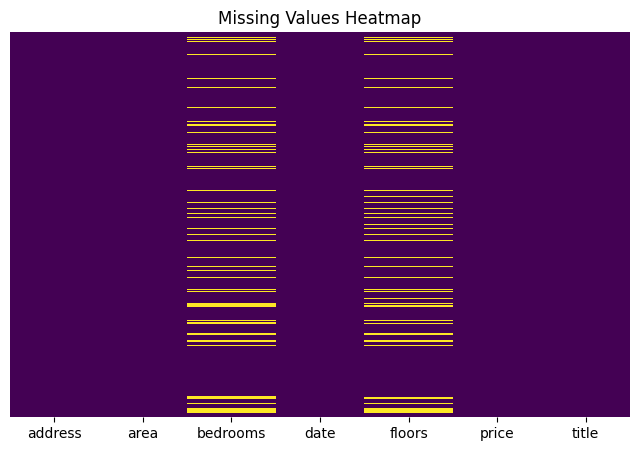

In [543]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [544]:
# Check stats of missing values
missing_stats = df.isnull().sum()
missing_stats = missing_stats[missing_stats > 0]
missing_stats = missing_stats.reset_index()
missing_stats.columns = ['Column', 'Missing Values']
missing_stats['Percentage'] = (missing_stats['Missing Values'] / len(df)) * 100
print("\nMissing values statistics:")
print(missing_stats)


Missing values statistics:
     Column  Missing Values  Percentage
0  bedrooms            3375       14.28
1    floors            3249       13.75


# Type conversion

In [545]:
df.head()

,address,area,bedrooms,date,floors,price,title
0,"Đường Nguyễn Văn Cừ, Phường Gia Thụy, Quận Lon...",80 m\n2,1 phòng ngủ,Hôm nay,1 lầu,"7,5 tỷ","🥇ĐẤT NGUYỄN VĂN CỪ 80M, MT8M, MẢNH ĐẤT RỘNG TH..."
1,"Đường Ngọc Lâm, Phường Ngọc Lâm, Quận Long Biê...",36 m\n2,3 phòng ngủ,Hôm nay,6 lầu,"8,65 tỷ","🔥CÒN DUY NHẤT 1 CĂN GIÁ RẺ, NGỌC LÂM 36M, 6T G..."
2,"Đường Ngô Gia Tự, Phường Đức Giang, Quận Long ...",56 m\n2,1 phòng ngủ,Hôm nay,1 lầu,"15,5 tỷ","👉MẶT PHỐ, NGÔ GIA TỰ, 56M, MT4M, VỈA HÈ ĐÁ BÓN..."
3,"Đường Phúc Lợi, Phường Phúc Lợi, Quận Long Biê...",32 m\n2,3 phòng ngủ,Hôm nay,5 lầu,"5,2 tỷ","🥇CĂN DUY NHẤT, NGÕ THÔNG, Ô TÔ , LÔ GÓC, PHÚC ..."
4,"Phố Lệ Mật, Phường Việt Hưng, Quận Long Biên, ...",58 m\n2,3 phòng ngủ,Hôm nay,3 lầu,7 tỷ,"🏡VIỆT HƯNG, DIỆN TÍCH RỘNG 58m, 3T, MT5m GIÁ C..."


## Address

In [546]:
# Extract road, ward, and district from address
def extract_address_components(address):
    road, ward, district = None, None, None
    if isinstance(address, str):
        # Road: Looks for various road type keywords followed by the road name (up to a comma)
        road_pattern = r'(?:Đường|Phố|Ngõ|Hẻm|Đại lộ|Tỉnh Lộ|Quốc lộ|QL|TL)\s+([^,]+)'
        # Ward: Looks for ward/commune/township keywords followed by the name (up to a comma)
        ward_pattern = r'(?:Phường|Xã|Thị trấn|P\.|X\.|TT\.)\s+([^,]+)'
        # District: Looks for district/town/city keywords followed by the name (up to a comma or period)
        district_pattern = r'(?:Quận|Huyện|Thị xã|Thành phố|Q\.|H\.)\s+([^,\.]+)'
        
        # Extract components
        road_match = re.search(road_pattern, address, re.IGNORECASE) # Added IGNORECASE for flexibility
        ward_match = re.search(ward_pattern, address, re.IGNORECASE)
        district_match = re.search(district_pattern, address, re.IGNORECASE)
        
        # Get the matched groups if found
        if road_match:
            road = road_match.group(1).strip()
        if ward_match:
            ward = ward_match.group(1).strip()
        if district_match:
            district = district_match.group(1).strip()
            
    return road, ward, district

# Apply the function to create new columns
df[['road', 'ward', 'district']] = df['address'].apply(
    lambda x: pd.Series(extract_address_components(x))
)

# Display the results
print("Sample address parsing results after update:")
sample_df = df[['address', 'road', 'ward', 'district']].head(10)
print(sample_df)

Sample address parsing results after update:
                                             address           road  \
0  Đường Nguyễn Văn Cừ, Phường Gia Thụy, Quận Lon...  Nguyễn Văn Cừ   
1  Đường Ngọc Lâm, Phường Ngọc Lâm, Quận Long Biê...       Ngọc Lâm   
2  Đường Ngô Gia Tự, Phường Đức Giang, Quận Long ...     Ngô Gia Tự   
3  Đường Phúc Lợi, Phường Phúc Lợi, Quận Long Biê...       Phúc Lợi   
4  Phố Lệ Mật, Phường Việt Hưng, Quận Long Biên, ...         Lệ Mật   
5  Đường Gia Thượng, Phường Ngọc Thụy, Quận Long ...     Gia Thượng   
6  Đường Thượng Thanh, Phường Thượng Thanh, Quận ...   Thượng Thanh   
7  Đường Thượng Thanh, Phường Thượng Thanh, Quận ...   Thượng Thanh   
8  Đường Nguyễn Sơn, Phường Gia Thụy, Quận Long B...     Nguyễn Sơn   
9  Đường Đức Giang, Phường Đức Giang, Quận Long B...      Đức Giang   

           ward   district  
0      Gia Thụy  Long Biên  
1      Ngọc Lâm  Long Biên  
2     Đức Giang  Long Biên  
3      Phúc Lợi  Long Biên  
4     Việt Hưng  Long Biên  

In [547]:
# Re-check for missing values in extracted components
print("\nMissing values in extracted address components after update:")
missing_address_components_updated = df[['road', 'ward', 'district']].isnull().sum()
print(missing_address_components_updated)

# Display some addresses where components might still be missing to see if improvement occurred
print("\nAddresses where 'road' might still be missing (first 5):")
print(df[df['road'].isnull()]['address'].head())

print("\nAddresses where 'ward' might still be missing (first 5):")
print(df[df['ward'].isnull()]['address'].head())


Missing values in extracted address components after update:
road        939
ward         33
district      0
dtype: int64

Addresses where 'road' might still be missing (first 5):
40     Phường Việt Hưng, Quận Long Biên, Hà Nội
51         Xã Thư Phú, Huyện Thường Tín, Hà Nội
210          Xã Phù Đổng, Huyện Gia Lâm, Hà Nội
216         Xã Trung Mầu, Huyện Gia Lâm, Hà Nội
255             Xã Vân Hòa, Huyện Ba Vì, Hà Nội
Name: address, dtype: object

Addresses where 'ward' might still be missing (first 5):
1237       Đường Võ Chí Công, Quận Cầu Giấy, Hà Nội
1299           Đường Trần Phú, Quận Hà Đông, Hà Nội
1655    Đường Thanh Nhàn, Quận Hai Bà Trưng, Hà Nội
1656      Đường Hoàng Ngân, Quận Thanh Xuân, Hà Nội
1657          Đường Cầu Giấy, Quận Cầu Giấy, Hà Nội
Name: address, dtype: object


In [548]:
# Create a column for complete extraction (where all components were found) as 1/0 instead of boolean
df['address_complete'] = df[['road', 'ward', 'district']].notnull().all(axis=1).astype(int)
print(f"\nAddresses with all components extracted: {df['address_complete'].sum()} ({df['address_complete'].mean()*100:.2f}%)")


Addresses with all components extracted: 22667 (95.90%)


In [549]:
# Convert address components to categorical codes for modeling/correlation
df['road_cat'] = df['road'].astype('category').cat.codes
df['ward_cat'] = df['ward'].astype('category').cat.codes
df['district_cat'] = df['district'].astype('category').cat.codes
df.head()

,address,area,bedrooms,date,floors,price,title,road,ward,district,address_complete,road_cat,ward_cat,district_cat
0,"Đường Nguyễn Văn Cừ, Phường Gia Thụy, Quận Lon...",80 m\n2,1 phòng ngủ,Hôm nay,1 lầu,"7,5 tỷ","🥇ĐẤT NGUYỄN VĂN CỪ 80M, MT8M, MẢNH ĐẤT RỘNG TH...",Nguyễn Văn Cừ,Gia Thụy,Long Biên,1,564,54,11
1,"Đường Ngọc Lâm, Phường Ngọc Lâm, Quận Long Biê...",36 m\n2,3 phòng ngủ,Hôm nay,6 lầu,"8,65 tỷ","🔥CÒN DUY NHẤT 1 CĂN GIÁ RẺ, NGỌC LÂM 36M, 6T G...",Ngọc Lâm,Ngọc Lâm,Long Biên,1,603,157,11
2,"Đường Ngô Gia Tự, Phường Đức Giang, Quận Long ...",56 m\n2,1 phòng ngủ,Hôm nay,1 lầu,"15,5 tỷ","👉MẶT PHỐ, NGÔ GIA TỰ, 56M, MT4M, VỈA HÈ ĐÁ BÓN...",Ngô Gia Tự,Đức Giang,Long Biên,1,587,390,11
3,"Đường Phúc Lợi, Phường Phúc Lợi, Quận Long Biê...",32 m\n2,3 phòng ngủ,Hôm nay,5 lầu,"5,2 tỷ","🥇CĂN DUY NHẤT, NGÕ THÔNG, Ô TÔ , LÔ GÓC, PHÚC ...",Phúc Lợi,Phúc Lợi,Long Biên,1,667,193,11
4,"Phố Lệ Mật, Phường Việt Hưng, Quận Long Biên, ...",58 m\n2,3 phòng ngủ,Hôm nay,3 lầu,7 tỷ,"🏡VIỆT HƯNG, DIỆN TÍCH RỘNG 58m, 3T, MT5m GIÁ C...",Lệ Mật,Việt Hưng,Long Biên,1,445,313,11


## Area, bedrooms, floors and price

In [ ]:
# Convert area, bedrooms, floors, and price to numeric types
# --- Area --- 
# Extracts numbers (e.g., "80", "36.5") from strings like "80 m2"
# User request: "1.111" should mean 1111, so dots are thousand separators. Commas are decimal separators.
area_series = df['area'].astype(str)
# Remove dots (thousand separators)
area_series_no_dots = area_series.str.replace(r'\.', '', regex=True)
# Replace commas with dots (decimal separators)
area_series_comma_as_dot = area_series_no_dots.str.replace(r',', '.', regex=True)
# Extract the number part
df['area'] = pd.to_numeric(area_series_comma_as_dot.str.extract(r'(\d+(?:\.\d+)?)', expand=False), errors='coerce')

# --- Bedrooms ---
# Extracts numbers (e.g., "1", "3") from strings like "1 phòng ngủ"
df['bedrooms'] = pd.to_numeric(df['bedrooms'].astype(str).str.extract(r'(\d+)', expand=False), errors='coerce').astype('Int64')

# --- Floors ---
# Extracts numbers (e.g., "1", "6") from strings like "1 lầu"
df['floors'] = pd.to_numeric(df['floors'].astype(str).str.extract(r'(\d+)', expand=False), errors='coerce').astype('Int64')

# --- Price ---
def parse_price(price_str):
    if pd.isna(price_str):
        return np.nan
    
    price_str_lower = str(price_str).lower()
    
    if 'thỏa thuận' in price_str_lower:
        return np.nan

    # Replace comma with dot for decimal
    cleaned_price_str = price_str_lower.replace(',', '.')
    
    num_part_match = re.search(r'(\d+(?:\.\d+)?)', cleaned_price_str)
    if not num_part_match:
        return np.nan
        
    num_val = float(num_part_match.group(1))
    
    if 'tỷ' in price_str_lower:  # Billion
        return num_val * 1000  # Convert billions to millions
    elif 'triệu' in price_str_lower:  # Million
        return num_val  # Already in millions
    # Assuming if no unit, it might be a direct VND value that needs conversion to millions.
    return num_val / 1e6 # Convert raw VND to millions

df['price_converted'] = df['price'].apply(parse_price)

print("Data types after numeric conversion:")
df.info()

print("\nDataFrame head after numeric conversion:")
df.head()

Data types after numeric conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 23635 entries, 0 to 38959
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           23635 non-null  object 
 1   area              23635 non-null  int64  
 2   bedrooms          20260 non-null  Int64  
 3   date              23635 non-null  object 
 4   floors            20386 non-null  Int64  
 5   price             23635 non-null  object 
 6   title             23635 non-null  object 
 7   road              22696 non-null  object 
 8   ward              23602 non-null  object 
 9   district          23635 non-null  object 
 10  address_complete  23635 non-null  int64  
 11  road_cat          23635 non-null  int16  
 12  ward_cat          23635 non-null  int16  
 13  district_cat      23635 non-null  int8   
 14  price_converted   23617 non-null  float64
dtypes: Int64(2), float64(1), int16(2), int64(2), int8(1), o

,address,area,bedrooms,date,floors,price,title,road,ward,district,address_complete,road_cat,ward_cat,district_cat,price_converted
0,"Đường Nguyễn Văn Cừ, Phường Gia Thụy, Quận Lon...",80,1,Hôm nay,1,"7,5 tỷ","🥇ĐẤT NGUYỄN VĂN CỪ 80M, MT8M, MẢNH ĐẤT RỘNG TH...",Nguyễn Văn Cừ,Gia Thụy,Long Biên,1,564,54,11,7500.00
1,"Đường Ngọc Lâm, Phường Ngọc Lâm, Quận Long Biê...",36,3,Hôm nay,6,"8,65 tỷ","🔥CÒN DUY NHẤT 1 CĂN GIÁ RẺ, NGỌC LÂM 36M, 6T G...",Ngọc Lâm,Ngọc Lâm,Long Biên,1,603,157,11,8650.00
2,"Đường Ngô Gia Tự, Phường Đức Giang, Quận Long ...",56,1,Hôm nay,1,"15,5 tỷ","👉MẶT PHỐ, NGÔ GIA TỰ, 56M, MT4M, VỈA HÈ ĐÁ BÓN...",Ngô Gia Tự,Đức Giang,Long Biên,1,587,390,11,15500.00
3,"Đường Phúc Lợi, Phường Phúc Lợi, Quận Long Biê...",32,3,Hôm nay,5,"5,2 tỷ","🥇CĂN DUY NHẤT, NGÕ THÔNG, Ô TÔ , LÔ GÓC, PHÚC ...",Phúc Lợi,Phúc Lợi,Long Biên,1,667,193,11,5200.00
4,"Phố Lệ Mật, Phường Việt Hưng, Quận Long Biên, ...",58,3,Hôm nay,3,7 tỷ,"🏡VIỆT HƯNG, DIỆN TÍCH RỘNG 58m, 3T, MT5m GIÁ C...",Lệ Mật,Việt Hưng,Long Biên,1,445,313,11,7000.00


In [551]:
# Describe the numeric columns to check for any anomalies
print("\nSummary statistics after numeric conversion:")
print(df.describe())


Summary statistics after numeric conversion:
          area  bedrooms   floors  address_complete  road_cat  ward_cat  \
count 23635.00  20260.00 20386.00          23635.00  23635.00  23635.00   
mean    122.08      6.47     5.33              0.96    565.27    192.34   
std     610.40      9.17     2.96              0.20    326.98    109.94   
min       2.00      1.00     1.00              0.00     -1.00     -1.00   
25%      45.00      3.00     4.00              1.00    319.00    108.00   
50%      60.00      4.00     5.00              1.00    564.00    177.00   
75%     100.00      6.00     6.00              1.00    844.00    293.00   
max   42000.00    300.00   130.00              1.00   1144.00    392.00   

       district_cat  price_converted  
count      23635.00         23617.00  
mean          13.16         31181.70  
std            8.84         68545.73  
min            0.00             0.00  
25%            6.00          7000.00  
50%           10.00         12800.00  
75%  

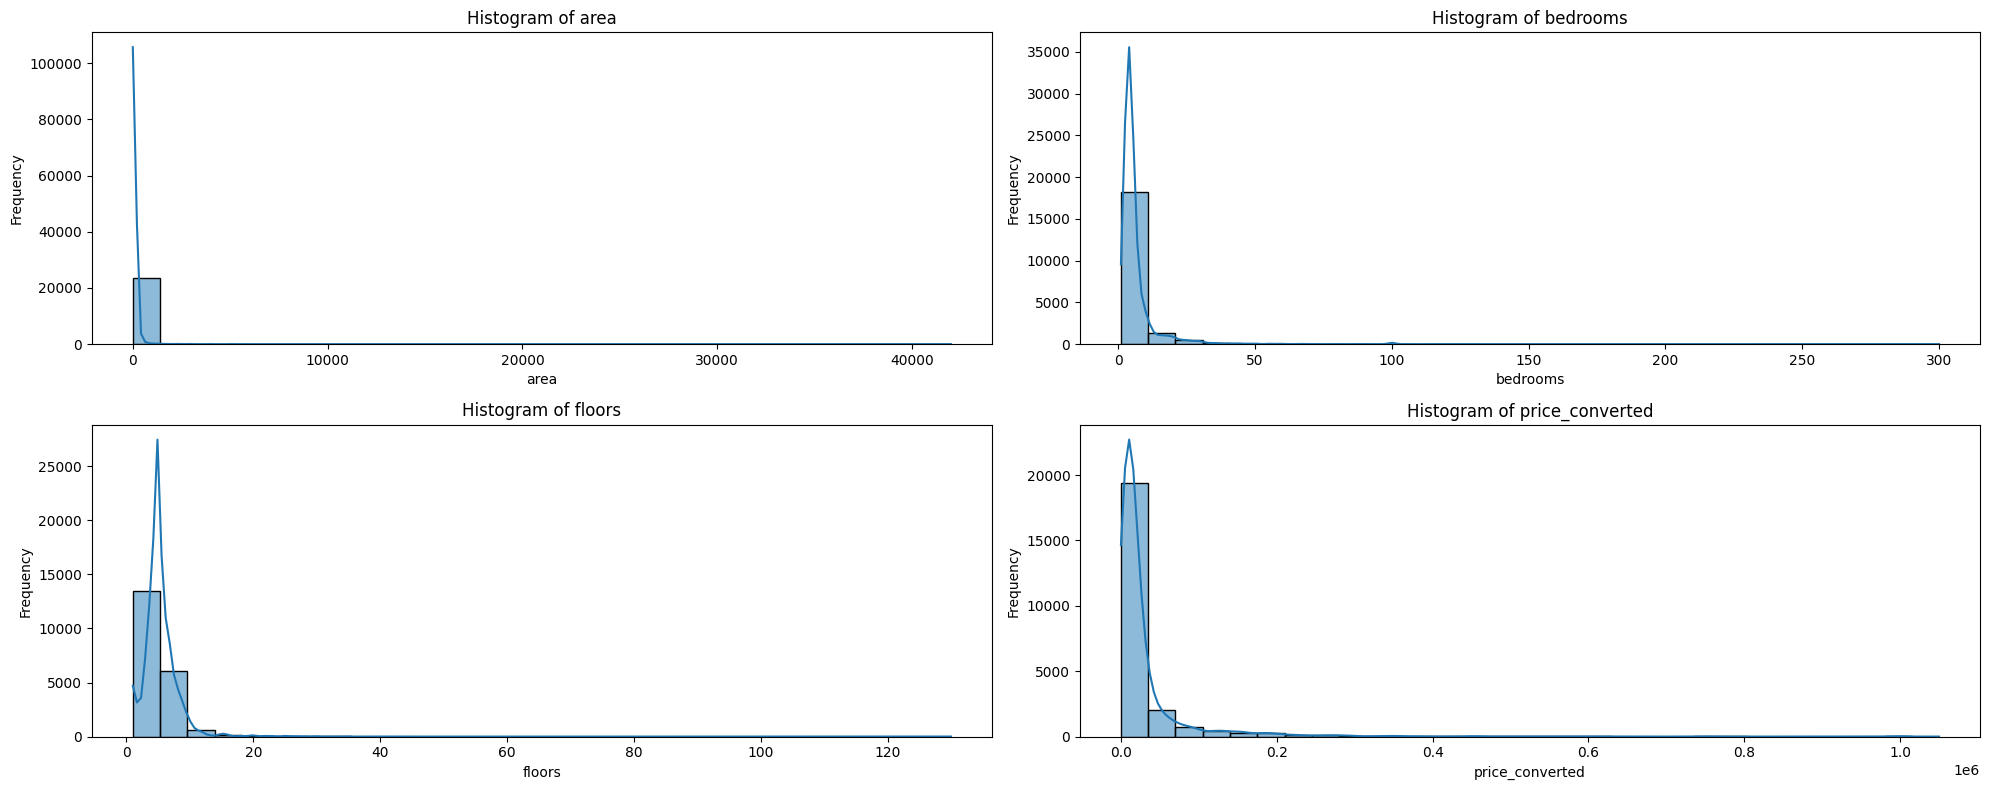

In [562]:
# Plot histograms for all numeric columns to check distributions and outliers

# Select only numeric columns for histograms
numeric_cols = ['area', 'bedrooms', 'floors', 'price_converted']

# Determine the layout for subplots
n_cols = 2  # Number of columns in subplot grid
n_rows = (len(numeric_cols) - 1) // n_cols + 1 # Calculate rows needed

plt.figure(figsize=(20, n_rows * 4)) # Adjust figure size based on number of rows

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

## Outlier Removal using IQR

In [553]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Columns to remove outliers from
outlier_columns = ['area', 'bedrooms', 'floors', 'price_converted']

print(f"Shape before outlier removal: {df.shape}")

df_no_outliers = df.copy()
for col in outlier_columns:
    df_no_outliers = remove_outliers_iqr(df_no_outliers, col)

print(f"Shape after outlier removal: {df_no_outliers.shape}")

# Display summary statistics after outlier removal
print("\nSummary statistics after outlier removal:")
print(df_no_outliers[outlier_columns].describe())

Shape before outlier removal: (23635, 15)
Shape after outlier removal: (14913, 15)

Summary statistics after outlier removal:
          area  bedrooms   floors  price_converted
count 14913.00  14913.00 14913.00         14913.00
mean     57.12      4.23     4.67         13556.40
std      26.02      1.68     1.49          8642.66
min       2.00      1.00     1.00             0.00
25%      40.00      3.00     4.00          7000.00
50%      50.00      4.00     5.00         10800.00
75%      68.00      5.00     5.00         18000.00
max     181.00     10.00     9.00         41500.00


## Histograms After Outlier Removal

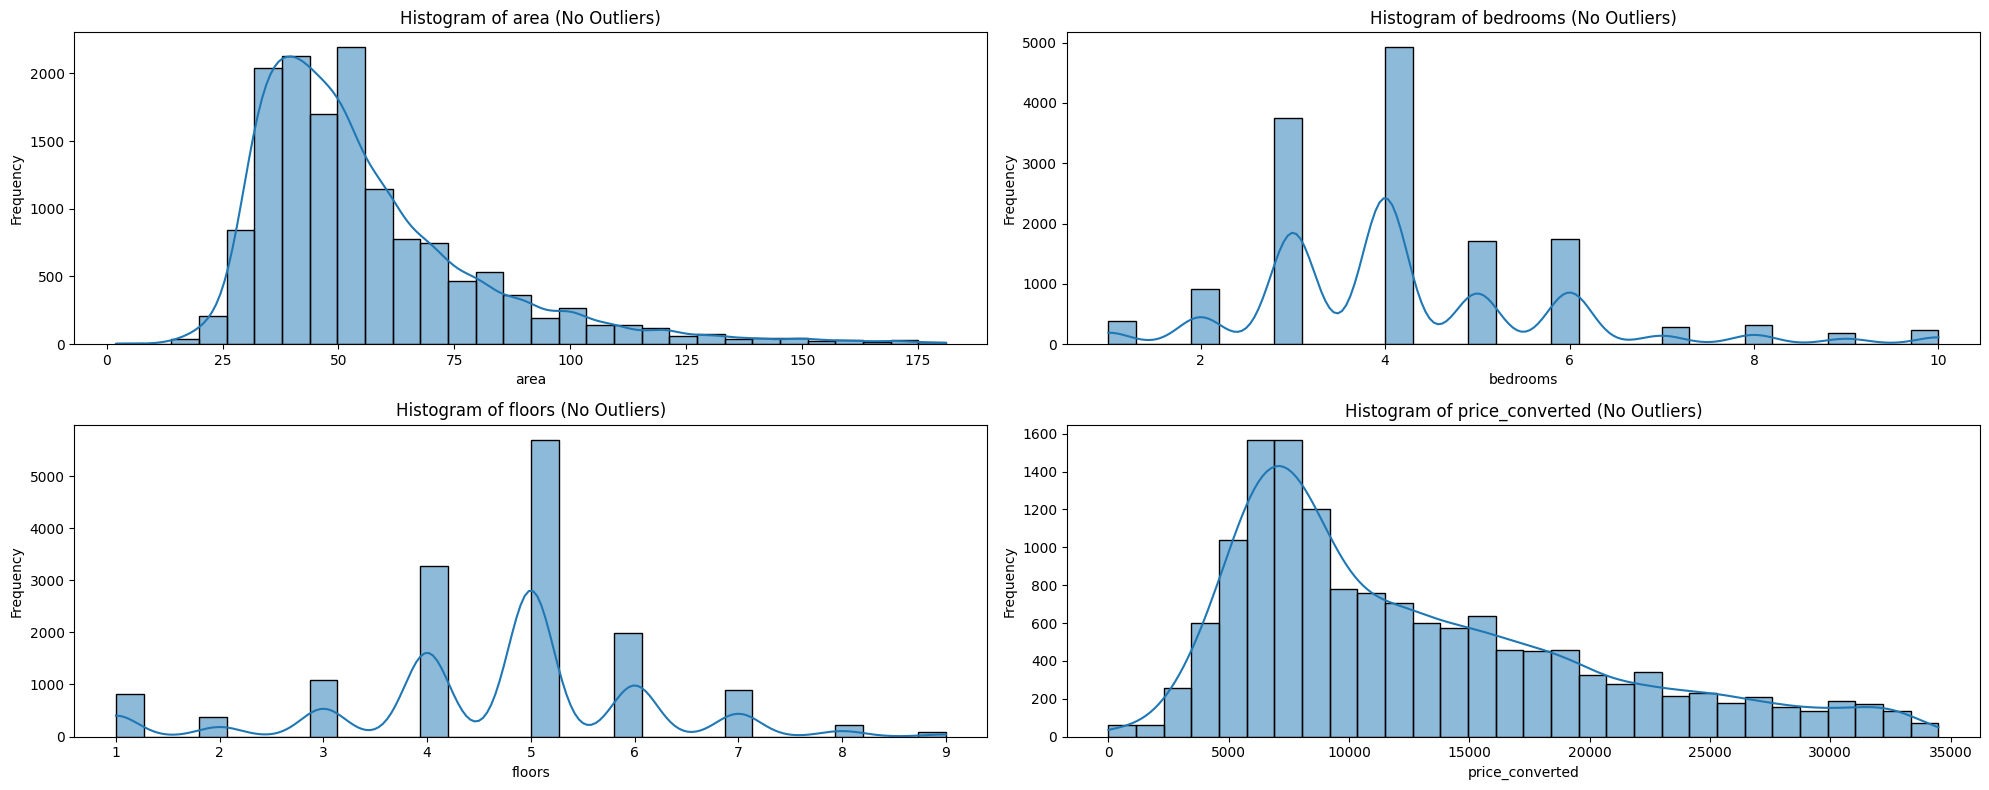

In [563]:
# Plot histograms for the columns after outlier removal
plt.figure(figsize=(20, n_rows * 4)) # n_rows and n_cols are defined in the previous histogram cell

for i, col in enumerate(outlier_columns): # Use the same outlier_columns list
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_no_outliers[col], kde=True, bins=30)
    plt.title(f'Histogram of {col} (No Outliers)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Create Price per m² Column

In [555]:
# Calculate price per m²
df_no_outliers['price_per_m2'] = df_no_outliers['price_converted'] / df_no_outliers['area']

# Display the DataFrame with the new column
print("\nDataFrame with 'price_per_m2' column:")
print(df_no_outliers[['area', 'price_converted', 'price_per_m2']].head())

print("\nSummary statistics for 'price_per_m2':")
print(df_no_outliers['price_per_m2'].describe())


DataFrame with 'price_per_m2' column:
   area  price_converted  price_per_m2
0    80          7500.00         93.75
1    36          8650.00        240.28
2    56         15500.00        276.79
3    32          5200.00        162.50
4    58          7000.00        120.69

Summary statistics for 'price_per_m2':
count   14913.00
mean      240.03
std       117.96
min         0.00
25%       169.01
50%       218.60
75%       294.64
max      3000.00
Name: price_per_m2, dtype: float64


In [556]:
# Show top 5 highest and lowest price per m²
print("\nTop 5 highest price per m²:")
print(df_no_outliers.nlargest(5, 'price_per_m2')[['area', 'price_converted', 'price_per_m2']])
print("\nTop 5 lowest price per m²:")
print(df_no_outliers.nsmallest(5, 'price_per_m2')[['area', 'price_converted', 'price_per_m2']])



Top 5 highest price per m²:
       area  price_converted  price_per_m2
7187      2          6000.00       3000.00
1341      4         10900.00       2725.00
3055      3          4900.00       1633.33
1499      4          5250.00       1312.50
27690    33         38000.00       1151.52

Top 5 lowest price per m²:
       area  price_converted  price_per_m2
12375   175             0.00          0.00
12921    82             1.41          0.02
36939   100            30.00          0.30
23694   150            85.00          0.57
29089   120            75.00          0.62


In [557]:
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'price_converted')
print("\nDataFrame shape after outlier removal:")
print(df_no_outliers.shape)
# Check for any remaining outliers
print("\nSummary statistics after outlier removal:")
print(df_no_outliers['price_converted'].describe())


DataFrame shape after outlier removal:
(14419, 16)

Summary statistics after outlier removal:
count   14419.00
mean    12726.60
std      7505.52
min         0.00
25%      6950.00
50%     10500.00
75%     17000.00
max     34500.00
Name: price_converted, dtype: float64


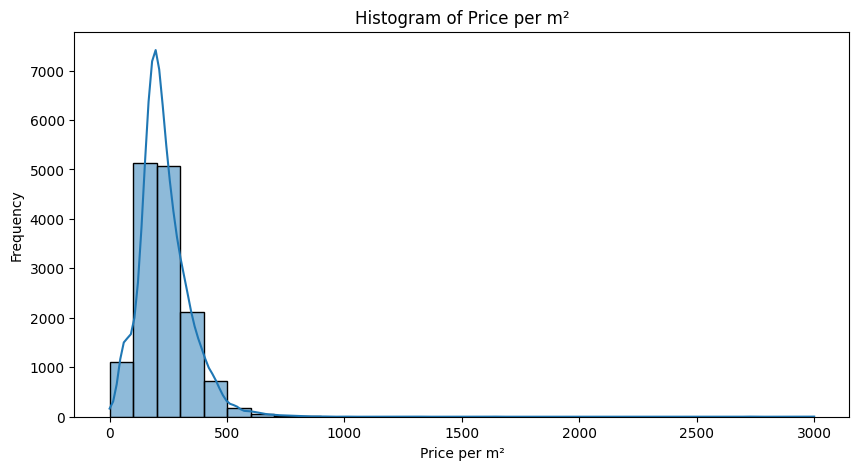

In [558]:
#price_per_m2 histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_no_outliers['price_per_m2'], kde=True, bins=30)
plt.title('Histogram of Price per m²')
plt.xlabel('Price per m²')
plt.ylabel('Frequency')
plt.show()

## Correlation with Price per m²


Correlation with price_per_m2:
                  price_per_m2
price_per_m2              1.00
floors                    0.36
bedrooms                  0.24
address_complete          0.08


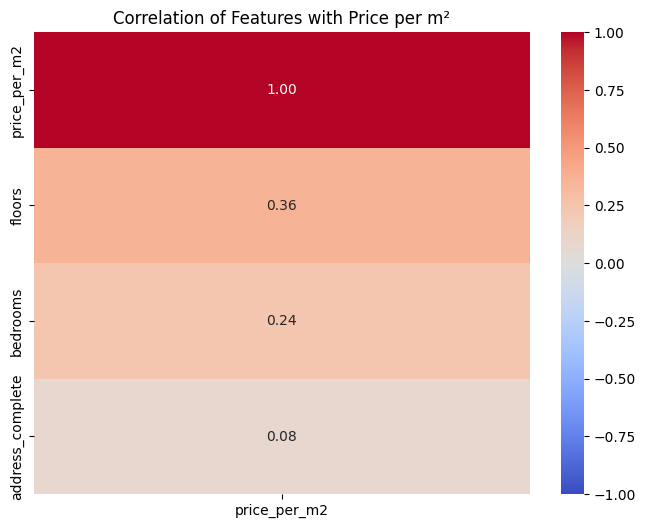

In [559]:

# Calculate correlation with price_per_m2
# Select relevant columns for correlation
# Exclude original price, address, non-encoded address parts, area, and price_converted
correlation_cols = ['bedrooms', 'floors', 'address_complete', 'price_per_m2']

# Ensure all selected columns are present in df_no_outliers
existing_correlation_cols = [col for col in correlation_cols if col in df_no_outliers.columns]

if not existing_correlation_cols or 'price_per_m2' not in existing_correlation_cols:
    print("Price_per_m2 or other critical columns for correlation are missing from df_no_outliers.")
else:
    correlation_matrix = df_no_outliers[existing_correlation_cols].corr()
    price_per_m2_corr = correlation_matrix[['price_per_m2']].sort_values(by='price_per_m2', ascending=False)

    print("\nCorrelation with price_per_m2:")
    print(price_per_m2_corr)

    # Plotting the correlation
    plt.figure(figsize=(8, 6))
    sns.heatmap(price_per_m2_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title('Correlation of Features with Price per m²')
    plt.show()


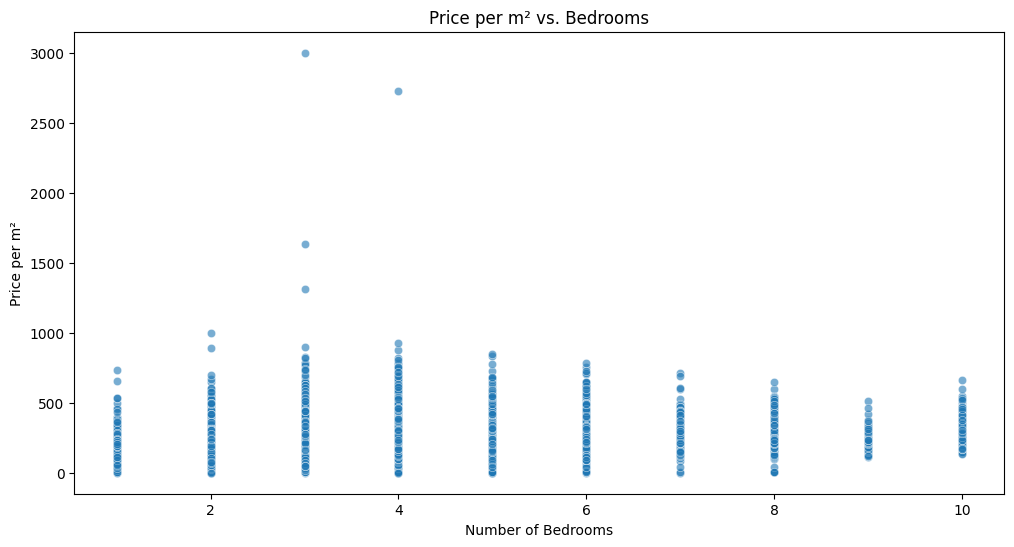

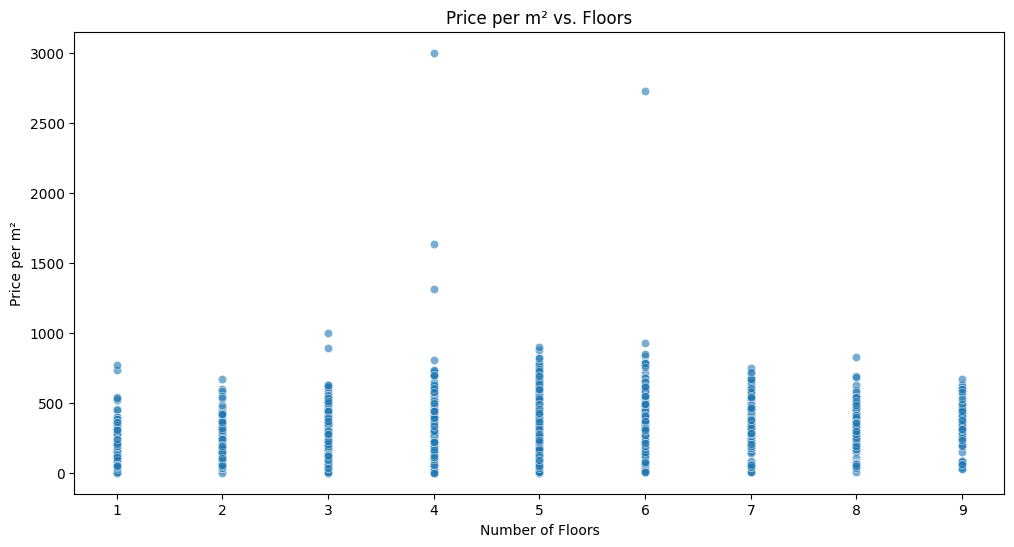

In [560]:
# Plot bedrooms and floors against price_per_m2
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_no_outliers, x='bedrooms', y='price_per_m2', alpha=0.6)
plt.title('Price per m² vs. Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price per m²')
plt.show()
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_no_outliers, x='floors', y='price_per_m2', alpha=0.6)
plt.title('Price per m² vs. Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Price per m²')
plt.show()

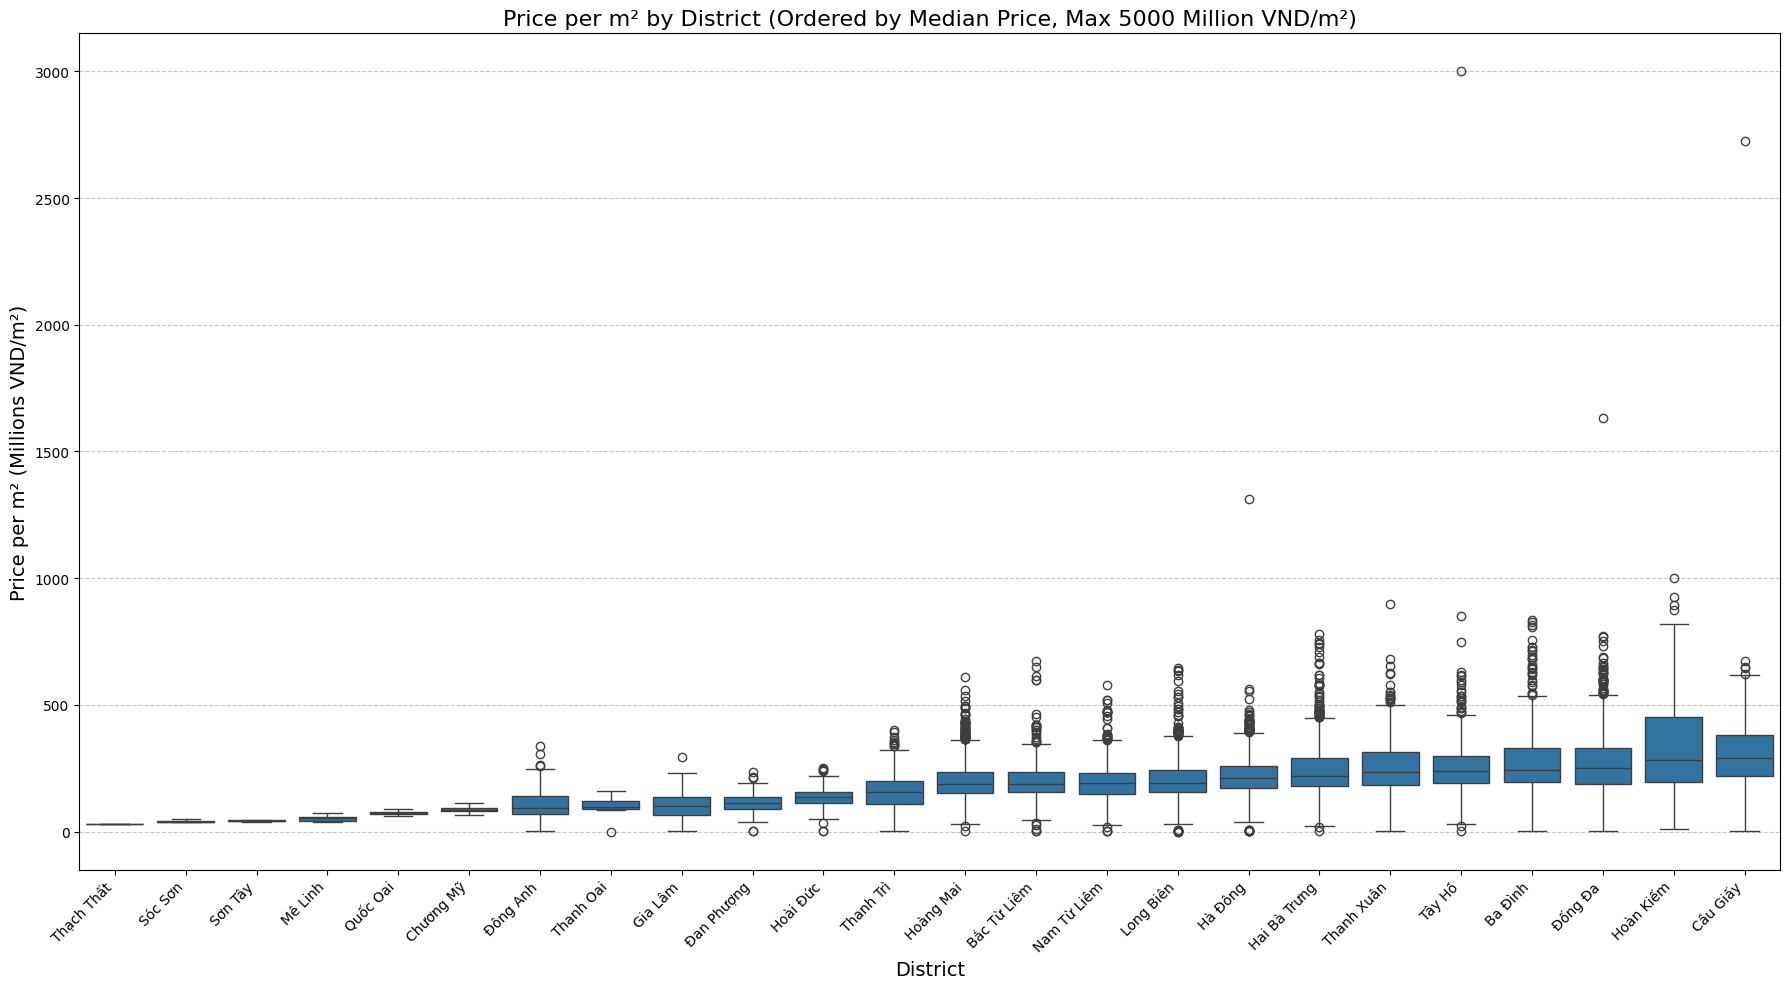

In [561]:
# Price per m² by district, limited to 5000 million VND

# Filter out outliers where price_per_m2 > 5000
df_filtered_price = df_no_outliers[df_no_outliers['price_per_m2'] <= 5000]

# Calculate the median price_per_m2 for each district to order them using the filtered data
if 'district' in df_filtered_price.columns and 'price_per_m2' in df_filtered_price.columns:
    median_prices = df_filtered_price.groupby('district')['price_per_m2'].median().sort_values()
    ordered_districts = median_prices.index

    plt.figure(figsize=(18, 10)) # Increased figure size for better readability
    sns.boxplot(data=df_filtered_price, x='district', y='price_per_m2', order=ordered_districts)
    plt.title('Price per m² by District (Ordered by Median Price, Max 5000 Million VND/m²)', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=10) # Adjusted rotation and alignment for better label visibility
    plt.xlabel('District', fontsize=14)
    plt.ylabel('Price per m² (Millions VND/m²)', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Added a light grid for the y-axis
    plt.tight_layout() # Adjust layout to prevent labels from overlapping    plt.show()
else:
    print("Columns 'district' or 'price_per_m2' not found in the filtered DataFrame, or the filtered DataFrame is empty.")
